<a href="https://colab.research.google.com/github/nschultze/CS579Project2/blob/main/2013_metrics_sample_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import networkx as nx

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CS579 Dataset/Taxi_Trips_2013.csv')

In [4]:
print(df)

            Trip Start Timestamp  Trip Miles  Pickup Community Area  \
0         12/31/2013 01:00:00 AM         1.1                     76   
1         08/27/2013 05:00:00 PM         0.4                      8   
2         08/22/2013 02:15:00 PM         0.1                     32   
3         08/25/2013 12:45:00 AM         0.1                     32   
4         12/31/2013 06:15:00 AM         1.6                      8   
...                          ...         ...                    ...   
12426725  08/26/2013 05:00:00 AM         0.3                      5   
12426726  12/31/2013 12:15:00 AM         0.2                      8   
12426727  08/30/2013 08:45:00 AM         1.6                      8   
12426728  08/28/2013 09:30:00 AM         0.3                     32   
12426729  12/28/2013 10:30:00 PM         2.8                      7   

          Dropoff Community Area  
0                             28  
1                             77  
2                             33  
3      

In [6]:
# Create a directed graph
G = nx.DiGraph()

## 1 mil rows in about 1 min 9 seconds
## 4 mil in 4.5 mins
## 12.4 mil in 14 mins 8 sec

for index, row in df.iterrows():
    if index % 100000 == 0: ## give idea of time
      print(index)
    from_community = row['Pickup Community Area']
    to_community = row['Dropoff Community Area']

    if G.has_edge(from_community, to_community):
        # Increment the weight of the existing edge by 1
        G[from_community][to_community]['weight'] += 1
    else:
        # Add a new edge with weight 1
        G.add_edge(from_community, to_community, weight=1)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
12000000
12100000
12200000
12300000

In [7]:
in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))

print("In-degree of nodes:", in_degrees)
print("Out-degree of nodes:", out_degrees)

In-degree of nodes: {76: 446847, 28: 1171146, 8: 3586925, 77: 161555, 32: 2188029, 33: 382126, 7: 979403, 10: 14658, 56: 162655, 66: 1506, 6: 1114308, 4: 112455, 24: 682030, 14: 43957, 44: 2599, 49: 1676, 3: 276883, 16: 77810, 22: 284371, 36: 2630, 5: 153141, 21: 60968, 41: 63435, 34: 29972, 31: 38117, 1: 74062, 60: 18122, 61: 3954, 15: 24485, 12: 8600, 23: 18215, 35: 28433, 2: 54561, 20: 5287, 69: 2773, 38: 6760, 39: 16555, 46: 1775, 19: 10204, 13: 13141, 37: 1210, 9: 2961, 59: 7113, 45: 769, 11: 14035, 27: 6005, 43: 6560, 42: 7269, 64: 1916, 25: 11161, 30: 6088, 65: 1248, 73: 720, 29: 4388, 58: 3494, 71: 1456, 62: 1009, 17: 5810, 40: 1848, 72: 1444, 70: 1161, 53: 289, 18: 1271, 63: 1301, 67: 1161, 57: 1686, 75: 710, 48: 1155, 68: 1842, 26: 1646, 51: 627, 74: 365, 50: 306, 52: 269, 54: 100, 47: 115, 55: 93}
Out-degree of nodes: {76: 546216, 28: 1025978, 8: 4089190, 77: 148012, 32: 2492092, 33: 285733, 7: 938411, 10: 4701, 56: 149646, 66: 464, 6: 1139270, 4: 74747, 24: 594777, 14: 3027

In [11]:
# sum of all out-degrees
sum_out_degrees = sum(dict(G.out_degree(weight = 'weight')).values())

# sum of all in-degrees
sum_in_degrees = sum(dict(G.in_degree(weight='weight')).values())

print("Sum of all out-degrees:", sum_out_degrees)
print("Sum of all in-degrees:", sum_in_degrees)
print(f'Total number of trips: {len(df)}')

Sum of all out-degrees: 12426730
Sum of all in-degrees: 12426730
Total number of trips: 12426730


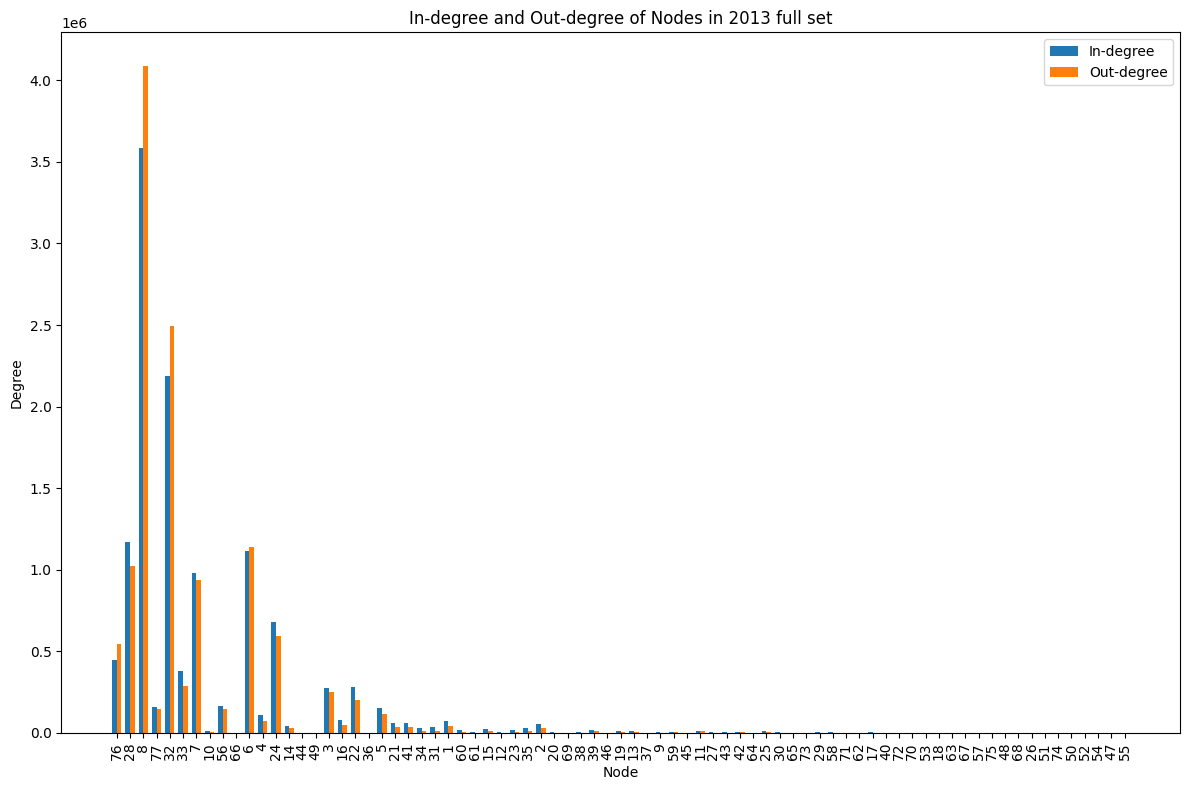

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# calc in-degrees and out-degrees
in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))

# node names for graphing
nodes = list(G.nodes())

# plot
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(nodes))

plt.bar(index, [in_degrees[node] for node in nodes], bar_width, label='In-degree')

plt.bar([i + bar_width for i in index], [out_degrees[node] for node in nodes], bar_width, label='Out-degree')

plt.xlabel('Node')
plt.ylabel('Degree')
plt.title('In-degree and Out-degree of Nodes in 2013 full set')
plt.xticks([i + bar_width / 2 for i in index], nodes, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:

num_rows = len(df)

# num rows to sample
sample_size = 1000000

if num_rows >= sample_size:
    # sample 1 million rows randomly without replacement
    sampled_df = df.sample(n=sample_size, replace=False, random_state=12357)
    print("Sampled DataFrame size:", sampled_df.shape)
else:
    print("DataFrame does not have enough rows to sample.")


Sampled DataFrame size: (1000000, 4)


In [23]:
# directed graph for our sample
G_sample = nx.DiGraph()

## 1 mil rows in about 1 min 9 seconds
for index, row in sampled_df.iterrows():
    if index % 100000 == 0: ## give idea of time
      print(index)
    from_community = row['Pickup Community Area']
    to_community = row['Dropoff Community Area']

    if G_sample.has_edge(from_community, to_community):
        # Increment the weight of the existing edge by 1
        G_sample[from_community][to_community]['weight'] += 1
    else:
        # Add a new edge with weight 1
        G_sample.add_edge(from_community, to_community, weight=1)

1100000
6900000
3000000
4400000
11300000
3100000
5900000
400000
5600000


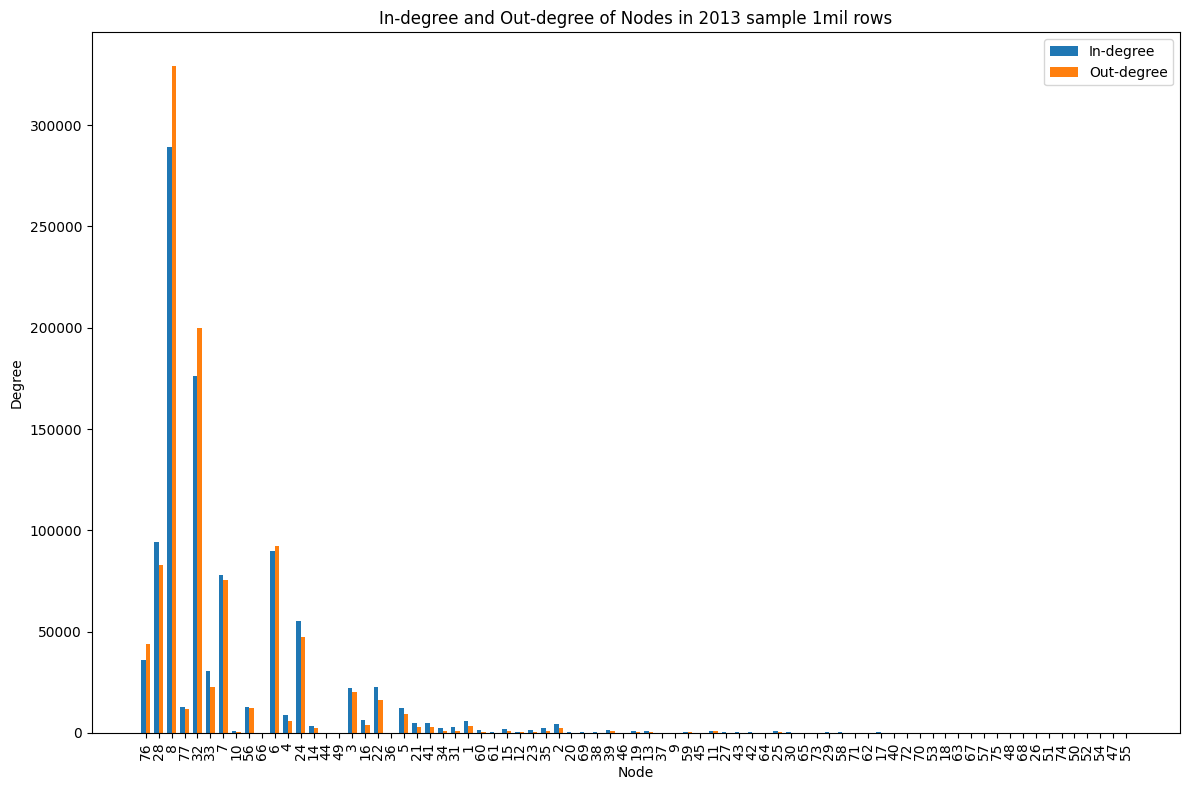

In [24]:
### visualize sampled data

in_degrees = dict(G_sample.in_degree(weight='weight'))
out_degrees = dict(G_sample.out_degree(weight='weight'))

# node names
nodes = list(G.nodes())

# plot
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(nodes))

plt.bar(index, [in_degrees[node] for node in nodes], bar_width, label='In-degree')

plt.bar([i + bar_width for i in index], [out_degrees[node] for node in nodes], bar_width, label='Out-degree')

plt.xlabel('Node')
plt.ylabel('Degree')
plt.title('In-degree and Out-degree of Nodes in 2013 sample 1mil rows')
plt.xticks([i + bar_width / 2 for i in index], nodes, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()
